In [1]:
import pandas as pd
import itertools

In [2]:
df=pd.read_csv('Part1_Crime_data.csv')
df

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.425218e+06,569888.200178,1,2022/02/12 11:40:00+00,6E,4100 8TH ST,LARCENY,NaN,NaN,913,SOUTHERN,BROOKLYN,39.2308,-76.6015,"(39.2308,-76.6015)",NaN,NaN,1,NaN
1,1.419316e+06,592809.775660,2,2022/02/12 00:33:00+00,3GF,400 W MULBERRY ST,ROBBERY - COMMERCIAL,NaN,FIREARM,114,CENTRAL,DOWNTOWN,39.2938,-76.6220,"(39.2938,-76.622)",NaN,NaN,1,NaN
2,1.430634e+06,593259.784078,3,2022/02/12 13:00:00+00,4E,200 N MILTON AVE,COMMON ASSAULT,NaN,NaN,221,SOUTHEAST,MCELDERRY PARK,39.2949,-76.5820,"(39.2949,-76.582)",NaN,NaN,1,NaN
3,1.413464e+06,598176.911968,4,2022/02/12 01:26:00+00,4E,700 CUMBERLAND ST,COMMON ASSAULT,NaN,NaN,734,WESTERN,SANDTOWN-WINCHESTER,39.3086,-76.6426,"(39.3086,-76.6426)",NaN,Western,1,NaN
4,1.413464e+06,598176.911968,5,2022/02/12 01:26:00+00,4E,700 CUMBERLAND ST,COMMON ASSAULT,NaN,NaN,734,WESTERN,SANDTOWN-WINCHESTER,39.3086,-76.6426,"(39.3086,-76.6426)",NaN,Western,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224172,1.410210e+06,598164.377192,224173,2017/01/01 15:00:00+00,3AJF,2300 WESTWOOD AVE,ROBBERY - CARJACKING,O,FIREARM,723,WESTERN,COPPIN HEIGHTS/ASH-CO-EAST,39.3086,-76.6541,"(39.3086,-76.6541)",STREET,Western,1,NaN
224173,1.431851e+06,593301.807994,224174,2017/01/01 14:50:00+00,3B,2800 PULASKI HWY,ROBBERY - STREET,O,NaN,221,SOUTHEAST,MCELDERRY PARK,39.2950,-76.5777,"(39.295,-76.5777)",STREET,NaN,1,NaN
224174,1.415946e+06,600335.749808,224175,2017/01/01 11:30:00+00,4C,2400 BROOKFIELD AVE,AGG. ASSAULT,NaN,OTHER,133,CENTRAL,RESERVOIR HILL,39.3145,-76.6338,"(39.3145,-76.6338)",NaN,NaN,1,NaN
224175,1.418297e+06,585739.419726,224176,2017/01/01 06:00:00+00,6J,500 ALLUVION ST,LARCENY,O,NaN,SD5,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2744,-76.6257,"(39.2744,-76.6257)",OTHER - OUTSIDE,NaN,1,NaN


In [3]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyproj
import math

P = pyproj.Proj(proj='utm', zone=31, ellps='WGS84', preserve_units=True)
G = pyproj.Geod(ellps='WGS84')

def LatLon_To_XY(Lat,Lon):
    return P(Lat,Lon)    

def XY_To_LatLon(x,y):
    return P(x,y,inverse=True)    

# def distance(Lat1, Lon1, Lat2, Lon2):
#     return G.inv(Lon1, Lat1, Lon2, Lat2)[2]

In [5]:
LatLon_To_XY(df.loc[0,'Latitude'],df.loc[0,'Longitude'])
x1,y1=LatLon_To_XY(49.30112,-123.02245)
# x2,y1=LatLon_To_XY(49.18444,-123.02245)
# x2,y2=LatLon_To_XY(49.18444,-123.20071)
# x1,y2=LatLon_To_XY(49.30112,-123.20071)

In [6]:
# print(x1,x2)
# print(y1,y2)

C:\Users\guras\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


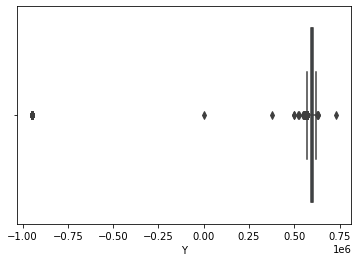

In [7]:
import seaborn as sns
sns.boxplot(df['Y'])

q75,q25 = df.loc[:,'X'].quantile(.75), df.loc[:,'X'].quantile(.25)
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df=df[(df.X>=min) & (df.X<=max)]
q75,q25 = df.loc[:,'Y'].quantile(.75), df.loc[:,'Y'].quantile(.25)
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df=df[(df.Y>=min) & (df.Y<=max)]

In [8]:
type(df)
df['X']

1         1.419316e+06
2         1.430634e+06
3         1.413464e+06
4         1.413464e+06
5         1.426397e+06
              ...     
224172    1.410210e+06
224173    1.431851e+06
224174    1.415946e+06
224175    1.418297e+06
224176    1.422822e+06
Name: X, Length: 221146, dtype: float64

In [9]:
x1,x2=df['X'].min(),df['X'].max()
y1,y2=df['Y'].min(),df['Y'].max()
print(x1,x2,y1,y2)
import numpy as np
x=np.linspace(x1,x2,9)
y=np.linspace(y1,y2,9)
print(x)
print(y)

1391016.10266316 1455144.19358853 569991.689557214 621724.4620611679
[1391016.10266316 1399032.11402883 1407048.1253945  1415064.13676017
 1423080.14812585 1431096.15949152 1439112.17085719 1447128.18222286
 1455144.19358853]
[569991.68955721 576458.28612021 582924.8826832  589391.4792462
 595858.07580919 602324.67237219 608791.26893518 615257.86549817
 621724.46206117]


In [10]:
len(df)
df['X_binned']=pd.cut(df['X'],x)
df['Y_binned']=pd.cut(df['Y'],y)
df['CrimeDateTime']=pd.to_datetime(df['CrimeDateTime'])
df['CrimeDate']=[x.date() for x in df['CrimeDateTime']]
df=df[(df['Description']=='COMMON ASSAULT') | (df['Description']=='LARCENY')]

In [11]:
df

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,...,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,X_binned,Y_binned,CrimeDate
2,1.430634e+06,593259.784078,3,2022-02-12 13:00:00+00:00,4E,200 N MILTON AVE,COMMON ASSAULT,NaN,NaN,221,...,39.2949,-76.5820,"(39.2949,-76.582)",NaN,NaN,1,NaN,"(1423080.148, 1431096.159]","(589391.479, 595858.076]",2022-02-12
3,1.413464e+06,598176.911968,4,2022-02-12 01:26:00+00:00,4E,700 CUMBERLAND ST,COMMON ASSAULT,NaN,NaN,734,...,39.3086,-76.6426,"(39.3086,-76.6426)",NaN,Western,1,NaN,"(1407048.125, 1415064.137]","(595858.076, 602324.672]",2022-02-12
4,1.413464e+06,598176.911968,5,2022-02-12 01:26:00+00:00,4E,700 CUMBERLAND ST,COMMON ASSAULT,NaN,NaN,734,...,39.3086,-76.6426,"(39.3086,-76.6426)",NaN,Western,1,NaN,"(1407048.125, 1415064.137]","(595858.076, 602324.672]",2022-02-12
7,1.420968e+06,596859.701532,8,2022-02-12 05:00:00+00:00,6E,1300 N CHARLES ST,LARCENY,NaN,NaN,134,...,39.3049,-76.6161,"(39.3049,-76.6161)",NaN,NaN,1,NaN,"(1415064.137, 1423080.148]","(595858.076, 602324.672]",2022-02-12
8,1.432583e+06,594252.218791,9,2022-02-12 00:00:00+00:00,6E,500 N POTOMAC ST,LARCENY,NaN,NaN,224,...,39.2976,-76.5751,"(39.2976,-76.5751)",NaN,NaN,1,NaN,"(1431096.159, 1439112.171]","(589391.479, 595858.076]",2022-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224165,1.423599e+06,590569.602998,224166,2017-01-01 00:00:00+00:00,4E,100 MARKET PL,COMMON ASSAULT,O,NaN,112,...,39.2876,-76.6069,"(39.2876,-76.6069)",OTHER - OUTSIDE,NaN,1,NaN,"(1423080.148, 1431096.159]","(589391.479, 595858.076]",2017-01-01
224167,1.428724e+06,583890.254770,224168,2017-01-01 00:00:00+00:00,6G,1200 STEUART ST,LARCENY,I,NaN,943,...,39.2692,-76.5889,"(39.2692,-76.5889)",APT/CONDO - OCCUPIED,NaN,1,NaN,"(1423080.148, 1431096.159]","(582924.883, 589391.479]",2017-01-01
224168,1.421493e+06,586626.880921,224169,2017-01-01 02:15:00+00:00,4E,1100 S CHARLES ST,COMMON ASSAULT,O,NaN,942,...,39.2768,-76.6144,"(39.2768,-76.6144)",STREET,NaN,1,NaN,"(1415064.137, 1423080.148]","(582924.883, 589391.479]",2017-01-01
224170,1.419367e+06,594157.661520,224171,2017-01-01 21:00:00+00:00,6E,400 W MONUMENT ST,LARCENY,O,NaN,125,...,39.2975,-76.6218,"(39.2975,-76.6218)",STREET,NaN,1,NaN,"(1415064.137, 1423080.148]","(589391.479, 595858.076]",2017-01-01


In [12]:
df=df[['X_binned','Y_binned','CrimeDate']]

In [13]:
cd=pd.DataFrame(df['CrimeDate'].unique())
cd.columns=['CrimeDate']
cd=cd.sort_values(by=['CrimeDate'])
# df=df.sort_values(by=['CrimeDateTime']).reset_index()

In [14]:
cd

,CrimeDate
1868,2017-01-01
1867,2017-01-02
1866,2017-01-03
1865,2017-01-04
1864,2017-01-05
...,...
4,2022-02-08
3,2022-02-09
2,2022-02-10
1,2022-02-11


In [15]:
l=len(cd)
mapping={}
for k in range(0,l):
    temp=cd.iloc[k:k+1,]
    df1=pd.merge(df,temp,on=['CrimeDate'],how='inner')
    heatmap=pd.DataFrame(df1.groupby(['X_binned','Y_binned'])['CrimeDate'].count())
    heatmap=heatmap.reset_index()
    heatmap=heatmap.pivot(index='X_binned', columns='Y_binned', values='CrimeDate')
#     display(np.array(heatmap))
#     print(type(temp.iloc[0,0]))
    mapping[temp.iloc[0,0]]=np.array(heatmap)

In [16]:
final1=[]
final_y=[]
for k in range(0,l-17):
    final=[]
    for i in range(k,k+16):
        temp=cd.iloc[i:i+1,]
        final.append(mapping[temp.iloc[0,0]])
    final1.append(final)
    
    temp=cd.iloc[i+1:i+2,]
    final_y.append(mapping[temp.iloc[0,0]])
    
X = np.stack(final1) 
Y = np.stack(final_y) 
X=np.expand_dims(X, axis=-1)
Y=np.expand_dims(Y, axis=1)
Y=np.expand_dims(Y, axis=-1)
X=np.swapaxes(X,1,3)
Y=np.swapaxes(Y,1,3)


In [17]:
def convert(x):
    return x>0
Y=convert(Y)
Y=Y.astype(int)

In [19]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(1184, 8, 8, 16, 1)
(1184, 8, 8, 1, 1)
(297, 8, 8, 16, 1)
(297, 8, 8, 1, 1)
(371, 8, 8, 16, 1)
(371, 8, 8, 1, 1)


In [ ]:
# print(X[0][0])
# display(X[0,:,:,:].tolist())
# np.savetxt('X.txt',X[0,:,:,:])
# print(X[1,0,:,:])
# print(Y[0,:,:])

In [ ]:
# display(temp[0,:,:,:].tolist())

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
time=16
x=8
y=8
channels=1
from keras.models import Sequential
inp=layers.Input(shape=(x,y,time,channels))
x=layers.ConvLSTM2D(filters=20, kernel_size=(3, 3)
                       , data_format='channels_last'
                       , recurrent_activation='hard_sigmoid'
                       , activation='tanh'
                   , padding='same', return_sequences=True)(inp)
# x=layers.BatchNormalization()(x)
x=layers.MaxPooling3D(pool_size=(1, 1, 2), padding='same', data_format='channels_last')(x)
x=layers.ConvLSTM2D(filters=20, kernel_size=(3, 3)
                       , data_format='channels_last'
                       , recurrent_activation='hard_sigmoid'
                       , activation='tanh'
                   , padding='same', return_sequences=True)(x)
# x=layers.BatchNormalization()(x)
x=layers.MaxPooling3D(pool_size=(1, 1, 2), padding='same', data_format='channels_last')(x)
x=layers.ConvLSTM2D(filters=20, kernel_size=(3, 3)
                       , data_format='channels_last'
                       , recurrent_activation='hard_sigmoid'
                       , activation='tanh'
                   , padding='same', return_sequences=True)(x)
# x=layers.BatchNormalization()(x)
x=layers.MaxPooling3D(pool_size=(1, 1, 2), padding='same', data_format='channels_last')(x)
x=layers.ConvLSTM2D(filters=20, kernel_size=(3, 3)
                       , data_format='channels_last'
                       , recurrent_activation='hard_sigmoid'
                       , activation='tanh'
                   , padding='same', return_sequences=True)(x)
# x=layers.BatchNormalization()(x)
x=layers.MaxPooling3D(pool_size=(1, 1, 2), padding='same', data_format='channels_last')(x)
x=layers.Conv3D(1, 
                     kernel_size = (3, 3, 1), 
                     padding = 'same',
                     activation = 'relu')(x)

model = keras.models.Model(inp, x)

In [23]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 16, 1)]     0         
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 8, 8, 16, 20)      15200     
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 8, 8, 20)      0         
 )                                                               
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 8, 8, 8, 20)       28880     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 8, 4, 20)      0         
 3D)                                                             
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 8, 8, 4, 20)       28880 

In [26]:
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 5
batch_size = 5

# Fit the model to the training data.
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/5
237/237 [==============================] - 35s 105ms/step - loss: 0.4638 - val_loss: 0.4524 - lr: 0.0010
Epoch 2/5
237/237 [==============================] - 25s 108ms/step - loss: 0.4711 - val_loss: 0.4986 - lr: 0.0010
Epoch 3/5
237/237 [==============================] - 27s 113ms/step - loss: 0.4523 - val_loss: 0.4453 - lr: 0.0010
Epoch 4/5
237/237 [==============================] - 29s 124ms/step - loss: 0.4415 - val_loss: 0.4396 - lr: 0.0010
Epoch 5/5
237/237 [==============================] - 44s 187ms/step - loss: 0.4410 - val_loss: 0.4508 - lr: 0.0010


In [27]:
y_pred=model.predict(X_test)

In [31]:
# y_pred=np.squeeze(y_pred,axis=-1)
# y_pred=np.squeeze(y_pred,axis=-1)
# y_test=np.squeeze(y_test,axis=-1)
# y_test=np.squeeze(y_test,axis=-1)

(371, 8, 8)
(371, 8, 8)


In [ ]:
print(y_test.shape)
print(y_pred.shape)

In [32]:
threshold=np.percentile(y_pred,96)
def transform(x):
    return x>=threshold

In [33]:
y_pred=transform(y_pred)
y_pred=y_pred.astype(int)

In [34]:
y_test
y_pred

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 1, 1, 0],
        [1, 1, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 1, ..., 0, 1, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 1, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [40]:
from sklearn.metrics import precision_score, accuracy_score,recall_score,f1_score

accuracy_score(y_test.flatten(), y_pred.flatten()),precision_score(y_test.flatten(), y_pred.flatten()),recall_score(y_test.flatten(), y_pred.flatten()),f1_score(y_test.flatten(), y_pred.flatten())

(0.6629043126684636,
 0.9463157894736842,
 0.10155896972435607,
 0.1834319526627219)